In [7]:
import streamlit as st
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
plants = pd.read_csv("combined.csv")
plant_errors = plants[plants["error"].notnull()]
plant_data = plants[~plants["error"].notnull()]
plants_to_display = ["Epipremnum Aureum","Venus flytrap","Cactus"]

<Axes: xlabel='api_id', ylabel='error'>

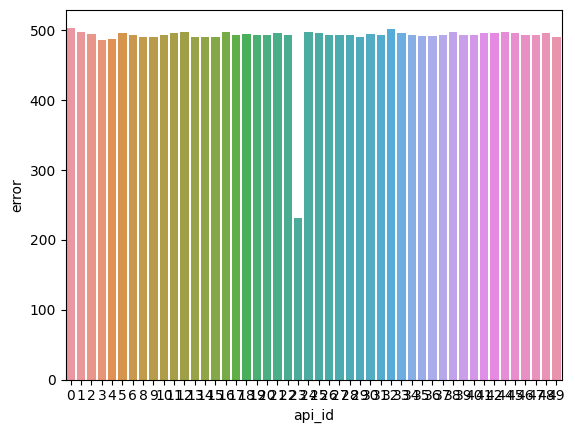

In [9]:
each_plant_error = plant_errors.groupby(["api_id"], as_index=True)
error_count = each_plant_error.count().reset_index()
error_count
sns.barplot(data=error_count, x="api_id", y="error")

<Axes: >

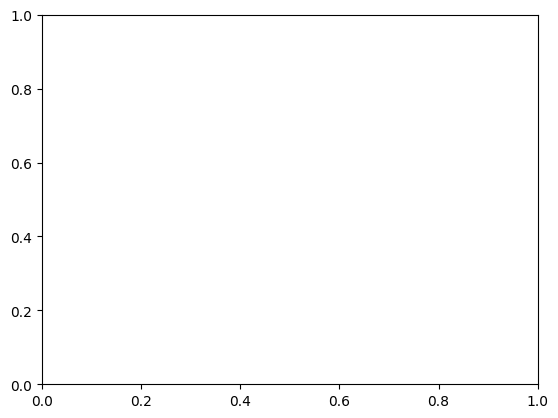

In [10]:
chosen_plants = plant_data[plant_data["plant_name"].isin(plants_to_display)]

each_plant_soil_moisture = chosen_plants.groupby(["plant_name"])["soil_moisture"]
average_soil_moisture_for_each_plant = each_plant_soil_moisture.mean()
sns.scatterplot(data=average_soil_moisture_for_each_plant)

In [11]:

keys = plant_data["continent"].unique()
from transform import remove_duplicate_plants

unique_plants = remove_duplicate_plants(plant_data)
plant_continents = unique_plants[["continent"]].value_counts()

plt.pie(plant_continents, labels=keys)

plt.show()

ModuleNotFoundError: No module named 'transform'

In [26]:
plants = pd.read_csv("combined.csv")
plant_df = plants[plants["error"] == "No Error"]
mean_data = plant_df.groupby(["continent"], as_index=False)["temperature"].mean()

mean_data

,continent,temperature
0,Africa,12.832283
1,America,12.268874
2,Asia,12.801994
3,Europe,11.492998
4,Pacific,9.875040


In [13]:
plant_df.groupby("continent")["temperature"].median()

continent
Africa     11.617738
America    12.059341
Asia       13.038005
Europe     10.584308
Pacific     9.473757
Name: temperature, dtype: float64

In [20]:
plant_df.groupby(["continent"], as_index=True)["temperature"].std()


continent
Africa     6.371531
America    5.826421
Asia       5.000073
Europe     6.639374
Pacific    2.272083
Name: temperature, dtype: float64

In [15]:
sns.barplot(mean_data, x="continent", y="temperature")

ValueError: Could not interpret input 'continent'